In [1]:
import pandas as pd
import math
from keras import models
from keras import layers
from keras import regularizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving vyborki.xlsx to vyborki.xlsx


In [3]:
df = pd.read_excel('vyborki.xlsx')
df.head()

# fill empty values ​​with the last number
df=df.fillna(222)
df = df.replace(222,np.nan).ffill()

# average for each hour
df.iloc[25:1009, :] = df.iloc[25:1009, :].rolling(13).mean().reindex(df.index[::13])

# average for every two hours
df.iloc[1009:1512, :] = df.iloc[1009:1512, :].rolling(25).mean().reindex(df.index[::25])

df = pd.concat([df[x].dropna().reset_index(drop=True) for x in df], axis=1)

# day
fet = df['d']
dataset = fet.values
met=dataset[:]
data = []
data.append(met[:])
date = np.array(data)

In [4]:
# train data
x_train = np.array(df.iloc[0:25, 0:45]).transpose()
y_train = np.array(df.iloc[20:, 0:45]).transpose()

# test data
x_test= np.array(df.iloc[0:25, 45:60]).transpose()
y_test = np.array(df.iloc[20:, 45:60]).transpose()

In [ ]:
np.random.seed(42)
train_data = x_train
train_targets = y_train

In [6]:
# ANN model
def build_model(optimizer='adam'):
  tf.random.set_seed(42)
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(32, activation='relu'))
  model.add(Dropout(0.5))
  model.add(layers.Dense(32, activation='relu'))
  model.add(Dropout(0.5))
  model.add(layers.Dense(99, activation='linear'))
  model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
  return model

In [7]:
# model training
model3=build_model(tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False))
history3 = model3.fit(x_train, y_train, epochs=853, validation_data=(x_test, y_test),batch_size=1, verbose=2)

Epoch 1/853
45/45 - 1s - loss: 0.0027 - mae: 0.0342 - val_loss: 0.0017 - val_mae: 0.0250 - 872ms/epoch - 19ms/step
Epoch 2/853
45/45 - 0s - loss: 0.0017 - mae: 0.0219 - val_loss: 0.0012 - val_mae: 0.0192 - 118ms/epoch - 3ms/step
Epoch 3/853
45/45 - 0s - loss: 0.0014 - mae: 0.0178 - val_loss: 9.4324e-04 - val_mae: 0.0183 - 109ms/epoch - 2ms/step
Epoch 4/853
45/45 - 0s - loss: 0.0012 - mae: 0.0166 - val_loss: 8.1213e-04 - val_mae: 0.0178 - 96ms/epoch - 2ms/step
Epoch 5/853
45/45 - 0s - loss: 0.0010 - mae: 0.0163 - val_loss: 7.5108e-04 - val_mae: 0.0177 - 115ms/epoch - 3ms/step
Epoch 6/853
45/45 - 0s - loss: 9.7180e-04 - mae: 0.0161 - val_loss: 7.2477e-04 - val_mae: 0.0176 - 97ms/epoch - 2ms/step
Epoch 7/853
45/45 - 0s - loss: 0.0010 - mae: 0.0163 - val_loss: 7.1942e-04 - val_mae: 0.0174 - 103ms/epoch - 2ms/step
Epoch 8/853
45/45 - 0s - loss: 9.2169e-04 - mae: 0.0157 - val_loss: 7.0590e-04 - val_mae: 0.0171 - 109ms/epoch - 2ms/step
Epoch 9/853
45/45 - 0s - loss: 8.9830e-04 - mae: 0.0158 -

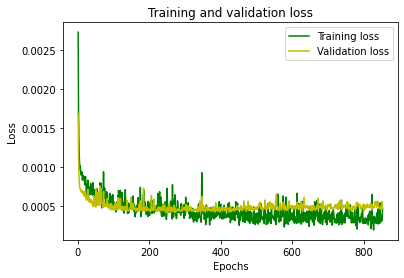

In [48]:
# change mse by epoch
plt.clf()
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

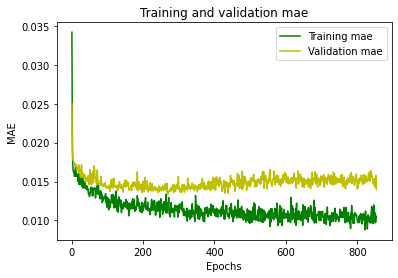

In [49]:
# change mae by epoch
plt.clf()
acc = history3.history['mae']
val_acc = history3.history['val_mae']
plt.plot(epochs, acc, 'g', label='Training mae')
plt.plot(epochs, val_acc, 'y', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

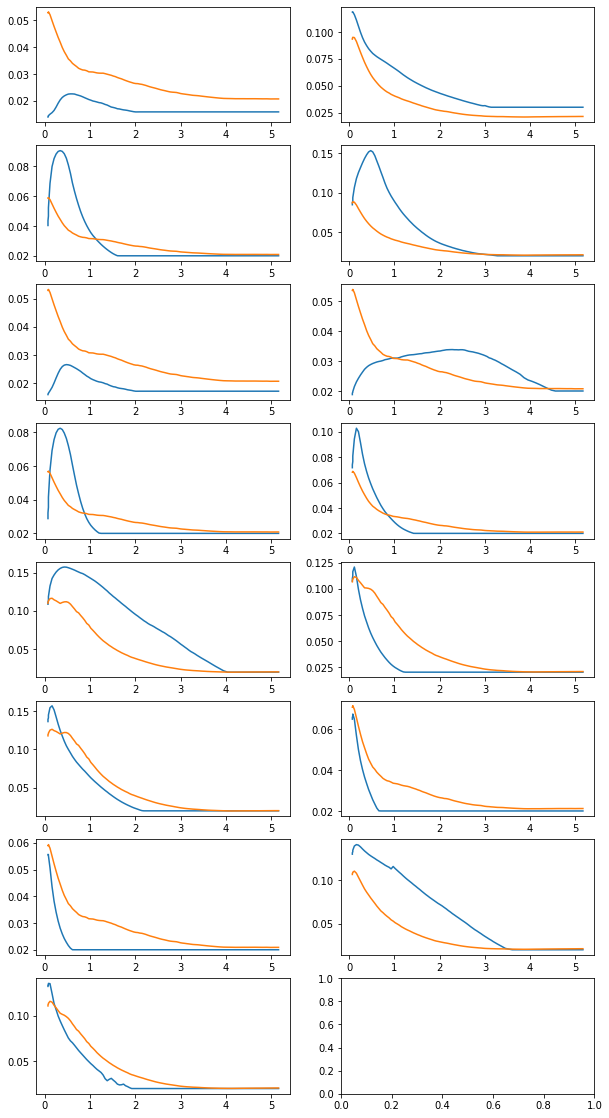

In [10]:
# blue = real voltage, orange - predicted voltage
pred = model3(x_test)
t = pred
t1 = y_test
fig, ax = plt.subplots(8, 2, figsize=(10, 20))
axs = [ax[i, j] for i in range(8) for j in range(2)]
for i in range(0, 15):
    axs[i].plot(date[0, 20:], t1[i])
    axs[i].plot(date[0, 20:], t[i])

In [19]:
# mean absolute error (mae) for test data
mae_er = []
for i in range(0, 15):
  mae_er.append(mean_absolute_error(t1[i], t[i]))

In [20]:
# mae
mae_er

[0.011506569685922983,
 0.01584095373078416,
 0.009292230259739999,
 0.020618875323558997,
 0.009799170616500635,
 0.007593852844117657,
 0.008773936309588434,
 0.00673959373046974,
 0.03769772631243684,
 0.015827758813344358,
 0.011573332362973546,
 0.0068110181153515185,
 0.006542545957211455,
 0.030647922339692654,
 0.010113389561105924]

In [21]:
# mean mae
np.mean(mae_er)

0.01395859173085326

In [22]:
# max absolute error (max)
max_er = []
for i in range(0, 15):
  max_er.append(max_error(t1[i], t[i]))

In [23]:
# max absolute error (max)
max_er

[0.03877180671691895,
 0.026717242446312364,
 0.04815557592236076,
 0.0961517676115036,
 0.036940890192985534,
 0.034826719862222674,
 0.04039456479090911,
 0.039882337604577725,
 0.06955094263370218,
 0.04857540988738727,
 0.03059482052509599,
 0.017879511322883457,
 0.016497891452679256,
 0.06306668493793562,
 0.022054555062147332]

In [24]:
# mean max
np.mean(max_er)

0.04200404806464146

In [25]:
# mean absolute percentage error (mape)
S = 0
mape_er = []
for j in range(0, y_test.shape[0]):
  for i in range(0, y_test.shape[1]):
    S += abs(y_test[j, i]-pred[j, i])/abs(pred[j, i])
  mape_er.append(S/y_test.shape[1])
  S = 0

In [26]:
# mape
mape_er 

[<tf.Tensor: shape=(), dtype=float32, numpy=0.36557892>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.4753143>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.26494274>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.46582285>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.30633005>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.23846118>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.25403216>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.18720017>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.86252546>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.28530535>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.20101291>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.20683399>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.20766516>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7675854>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.19939429>]

In [27]:
mape_er  = np.array(mape_er )

In [45]:
# mean mape
mape_er.mean()

0.35253364

In [29]:
# simpson's method for integrating amperage
def Q_Simpson(x, f):
  Q=[]
  SUM_Q = 0
  for i in range(2, f.shape[0]):
    SUM_Q+=(x[i]-x[i-2])*(f[i-2]+4*f[i-1]+f[i])/6
    Q.append(SUM_Q)
  return Q

In [30]:
# minutes
fet = df['min']
dataset = fet.values
met=dataset[:]

minut = []
minut.append(met[:])

minut = np.array(minut)

In [31]:
# seconds
second = minut*60

In [32]:
# charge received at predicted voltage
Q_pred = np.array([Q_Simpson(second[0], np.concatenate([x_test[i], t[i][5:]])/100) for i in range(0, 15)])

# charge received at real voltage
Q_real = np.array([Q_Simpson(second[0], np.concatenate([x_test[i], t1[i][5:]])/100) for i in range(0, 15)])

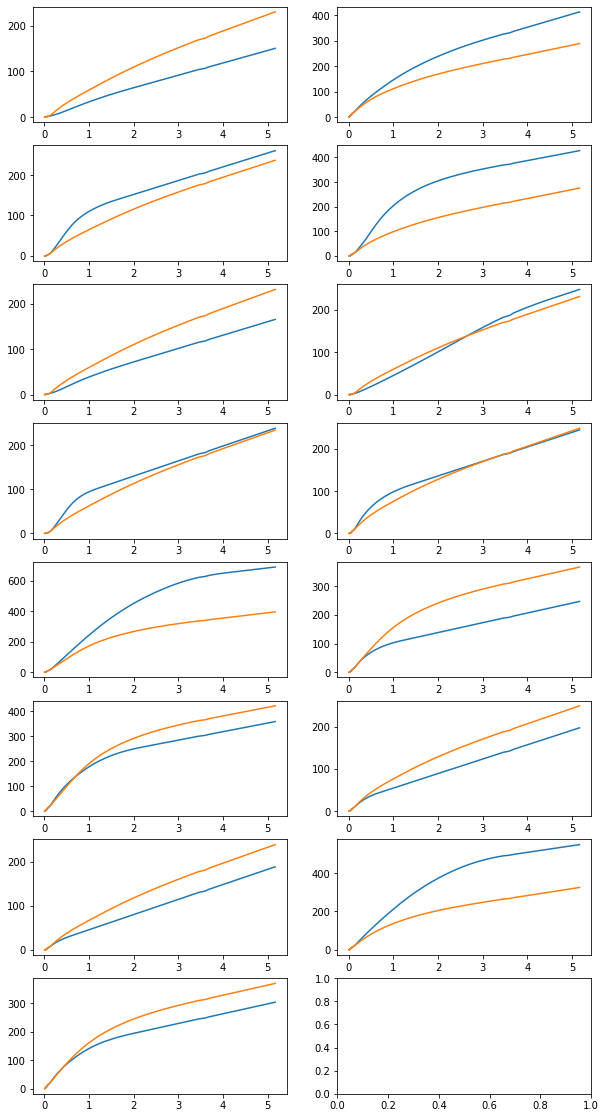

In [33]:
# blue = real charge, orange - predicted charge
fig, ax = plt.subplots(8, 2, figsize=(10, 20))
axs = [ax[i, j] for i in range(8) for j in range(2)]
for i in range(0, 15):
    axs[i].plot(date[0, 2:], Q_real[i])
    axs[i].plot(date[0, 2:], Q_pred[i])

In [34]:
# mean absolute error (mae)
TEST_MAE_ERROR = []
for i in range(0, 15):
  TEST_MAE_ERROR.append(mean_absolute_error(Q_real[i, x_train.shape[1]:], Q_pred[i, x_train.shape[1]:]))

In [35]:
# mae
TEST_MAE_ERROR 

[47.22030945013247,
 70.13879637237058,
 31.81037817229091,
 129.16932955390502,
 39.51239224004142,
 10.99582606130101,
 15.040295529816353,
 8.720538520548393,
 184.75970355535034,
 89.19887127406967,
 40.73114064994951,
 36.42369112376718,
 35.26594246444551,
 156.46211360082813,
 45.02976752835798]

In [36]:
# mean mae
np.array(TEST_MAE_ERROR).mean()

62.698606406478305

In [37]:
# max absolute error (max)
TEST_MAX_ERROR = []
for i in range(0, 15):
  TEST_MAX_ERROR.append(max_error(Q_real[i, x_train.shape[1]:], Q_pred[i, x_train.shape[1]:]))

In [38]:
# max absolute error (max)
TEST_MAX_ERROR

[80.06333208956323,
 124.54205568813802,
 46.00140365442422,
 155.56617871609726,
 65.87983601831607,
 17.59384548494856,
 32.44739206895781,
 22.984770104142385,
 294.4641518463868,
 119.99806503929926,
 63.07807804287245,
 52.263748806724266,
 50.42992249595983,
 225.38827852453846,
 65.965516700492]

In [39]:
# mean max
np.array(TEST_MAX_ERROR).mean()

94.44443835205739

In [40]:
# mean absolute percentage error (mape)
S = 0
E = []
for j in range(0, Q_real.shape[0]):
  for i in range(x_train.shape[1], Q_real.shape[1]):
    S += abs(Q_real[j, i]-Q_pred[j, i])/abs(Q_pred[j, i])
  E.append(S/  Q_real.shape[1])
  S = 0

In [41]:
# mean absolute percentage error (mape)
E

[0.3298452998061558,
 0.29332981021336785,
 0.2716881946955787,
 0.6495094378893407,
 0.27514336278936485,
 0.11095040237724987,
 0.16210901006932865,
 0.09558867042424649,
 0.5030555678438842,
 0.2770735147011779,
 0.10462294837024129,
 0.20609943158394056,
 0.22122747106012955,
 0.5564700151640029,
 0.13348467563845554]

In [42]:
# mean mape
np.array(E).mean()

0.2793465208417643

In [43]:
# max mape
S = 0
E = []
D = []
for j in range(0, Q_real.shape[0]):
  for i in range(x_train.shape[1], Q_real.shape[1]):
    D.append(abs(Q_real[j, i]-Q_pred[j, i])/abs(Q_pred[j, i]))

In [46]:
# max mape
np.array(D).max()

1.0838262829122238